In [140]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rishi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\rishi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [141]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from nltk.stem.lancaster import LancasterStemmer
from nltk.stem.wordnet import WordNetLemmatizer




def stem_words(words):
    """Stem words in list of tokenized words"""
    stemmer = LancasterStemmer()
    stems = []
    for word in words:
        stem = stemmer.stem(word)
        stems.append(stem)
    return stems

def lemmatize_verbs(words):
    """Lemmatize verbs in list of tokenized words"""
    lemmatizer = WordNetLemmatizer()
    lemmas = []
    for word in words:
        lemma = lemmatizer.lemmatize(word, pos='v')
        lemmas.append(lemma)
    return lemmas

def stem_and_lemmatize(words):
    stems = stem_words(words)
    return " ".join(stems)
    lemmas = lemmatize_verbs(stems)
    return " ".join(lemmas)




def clean_string(mystr):
    mystr=mystr.lower()
    mystr=re.sub(r"\\\w+", " ", mystr)
    mystr=re.sub(r"\@\w+"," ",mystr)
    mystr=re.sub(r"\#\w+"," ",mystr)
    mystr=re.sub(r"https?:\/\/(www\.)?[-a-zA-Z0-9@:%._\+~#=]{1,256}\.[a-zA-Z0-9()]{1,6}\b([-a-zA-Z0-9()@:%_\+.~#?&//=]*)"," ",mystr)
    
    mystr=mystr[2:-1]
    
    cleantext = "".join([x.lower() if (x.isalpha() or x.isspace()) else ' ' for x in mystr])
    
    return cleantext

def remove_stop_words(mystr):
    word_list= mystr.split()
    cleaned_word_list=[w for w in word_list if w not in stop_words and len(w)>=2]
    
    return cleaned_word_list
   
    

   


In [142]:

import os
goal_dir = os.path.join(os.getcwd(), "tweets_raw/")

for filename in os.listdir(goal_dir):
    if filename.endswith(".csv"): 
         print(filename)

eBay_tweets.csv
eBay_tweets_drop2.csv
facebook_tweets.csv
facebook_tweets_drop2.csv
FoodandTravelEd_tweets.csv
FoodandTravelEd_tweets_drop2.csv
ladygaga_tweets.csv
ladygaga_tweets_drop2.csv
MTV_tweets.csv
MTV_tweets_drop2.csv
nytimes_tweets.csv
nytimes_tweets_drop2.csv
parenting_tweets.csv
parenting_tweets_drop2.csv
premierleague_tweets.csv
premierleague_tweets_drop2.csv
tesla_tweets.csv
tesla_tweets_drop2.csv
usedgov_tweets.csv
usedgov_tweets_drop2.csv


In [143]:
from numpy import asarray
from numpy import savetxt
import numpy as np
        
goal_dir = os.path.join(os.getcwd(), "tweets_raw/")

import os

dataframes = {}

for filename in os.listdir(goal_dir):
    if filename.endswith(".csv"): 
        file = pd.read_csv("tweets_raw/"+filename)
        file['clean_text']=file['text'].apply(clean_string)
        file['word list']=file['clean_text'].apply(remove_stop_words)
        file['cleaned_word_list']=file['word list'].apply(stem_and_lemmatize)
        
        del file['word list']

        vectorizer = TfidfVectorizer()
        tfidfmatrix = vectorizer.fit_transform(file['cleaned_word_list'])

        vocab = vectorizer.get_feature_names()
        tfidf_data=tfidfmatrix.toarray()
        
        tfidf_pd=pd.DataFrame(data=tfidf_data,columns=vocab,index=file['id'])
        
        dataframes[filename] = tfidf_pd       



In [144]:
dataframes.keys()

dict_keys(['eBay_tweets.csv', 'eBay_tweets_drop2.csv', 'facebook_tweets.csv', 'facebook_tweets_drop2.csv', 'FoodandTravelEd_tweets.csv', 'FoodandTravelEd_tweets_drop2.csv', 'ladygaga_tweets.csv', 'ladygaga_tweets_drop2.csv', 'MTV_tweets.csv', 'MTV_tweets_drop2.csv', 'nytimes_tweets.csv', 'nytimes_tweets_drop2.csv', 'parenting_tweets.csv', 'parenting_tweets_drop2.csv', 'premierleague_tweets.csv', 'premierleague_tweets_drop2.csv', 'tesla_tweets.csv', 'tesla_tweets_drop2.csv', 'usedgov_tweets.csv', 'usedgov_tweets_drop2.csv'])

In [145]:
tesla_tfidf = dataframes['tesla_tweets.csv']
tesla_tfidf_2 = dataframes['tesla_tweets_drop2.csv']

In [160]:
ebday_tfidf = dataframes['eBay_tweets.csv']
fb_tfidf = dataframes['facebook_tweets.csv']
fnt_tfidf = dataframes['FoodandTravelEd_tweets.csv']
gaga_tfidf = dataframes['ladygaga_tweets.csv']
mtv_tfidf = dataframes['MTV_tweets.csv']
parenting_tfidf = dataframes['parenting_tweets.csv']
fpl_tfidf = dataframes['premierleague_tweets.csv']
gov_tfidf = dataframes['usedgov_tweets.csv']
nyt_tfidf = dataframes['nytimes_tweets.csv']

ebday_tfidf_2 = dataframes['eBay_tweets_drop2.csv']
fb_tfidf_2 = dataframes['facebook_tweets_drop2.csv']
fnt_tfidf_2 = dataframes['FoodandTravelEd_tweets_drop2.csv']
gaga_tfidf_2 = dataframes['ladygaga_tweets_drop2.csv']
mtv_tfidf_2 = dataframes['MTV_tweets_drop2.csv']
parenting_tfidf_2 = dataframes['parenting_tweets_drop2.csv']
fpl_tfidf_2 = dataframes['premierleague_tweets_drop2.csv']
gov_tfidf_2 = dataframes['usedgov_tweets_drop2.csv']
nyt_tfidf_2 = dataframes['nytimes_tweets_drop2.csv']

In [161]:
tesla_tfidf['label'] = 1
tesla_tfidf_2['label'] = 1

In [162]:
fb_tfidf['label'] = 0
fnt_tfidf['label'] = 0
ebday_tfidf['label'] = 0
gaga_tfidf['label'] = 0
mtv_tfidf['label'] = 0
nyt_tfidf['label'] = 0
parenting_tfidf['label'] = 0
fpl_tfidf['label'] = 0
gov_tfidf['label'] = 0

fb_tfidf_2['label'] = 0
fnt_tfidf_2['label'] = 0
ebday_tfidf_2['label'] = 0
gaga_tfidf_2['label'] = 0
mtv_tfidf_2['label'] = 0
nyt_tfidf_2['label'] = 0
parenting_tfidf_2['label'] = 0
fpl_tfidf_2['label'] = 0
gov_tfidf_2['label'] = 0

In [163]:
vertical_stack = pd.concat([tesla_tfidf, fb_tfidf,fnt_tfidf,ebday_tfidf,gaga_tfidf,mtv_tfidf,parenting_tfidf,fpl_tfidf,gov_tfidf,nyt_tfidf,tesla_tfidf_2, fb_tfidf_2,fnt_tfidf_2,ebday_tfidf_2,gaga_tfidf_2,mtv_tfidf_2,parenting_tfidf_2,fpl_tfidf_2,gov_tfidf_2,nyt_tfidf_2], axis=0)
vertical_stack = vertical_stack.fillna(0)

C:\Users\rishi\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [164]:
vertical_stack.shape

(59939, 15425)

In [165]:
vertical_stack=vertical_stack.drop_duplicates().reset_index(drop=True)
y = vertical_stack['label']
vertical_stack = vertical_stack.drop('label', 1)

In [166]:
vertical_stack.shape

(55256, 15424)

In [167]:
from sklearn.feature_selection import chi2

In [168]:
chi2score = chi2(vertical_stack, y)

In [169]:
chi2score[0]

array([0.14951883, 0.19220541, 0.078788  , ..., 0.10598698, 0.11563276,
       0.19241414])

In [170]:
np.argsort(chi2score[0])[::-1]

array([ 8593, 13392,  3824, ...,  2726, 12532,  1758], dtype=int64)

In [171]:
vertical_stack.columns[np.argsort(chi2score[0])[::-1]][:100]

Index(['model', 'tesl', 'driv', 'supercharg', 'car', 'own', 'autopilot',
       'battery', 'sol', 'powerwal', 'gigafact', 'stor', 'enjoy', 'charg',
       'emit', 'energy', 'test', 'gas', 'roof', 'rid', 'nic', 'rang', 'elect',
       'km', 'ludicr', 'accel', 'vehic', 'mph', 'dm', 'revolv', 'suv', 'mod',
       'info', 'grid', 'teslamot', 'road', 'sem', 'norway', 'reserv',
       'contact', 'zero', 'ii', 'wheel', 'dot', 'powerpack', 'tesla', 'roadst',
       'solarc', 'mil', 'gallon', 'fossil', 'sed', 'awd', 'refer', 'mi',
       'summon', 'elon', 'congr', 'gasolin', 'austral', 'kwh', 'loc', 'yet',
       'fleet', 'sentry', 'fut', 'drov', 'showroom', 'pdt', 'delivery', 'rwd',
       'instal', 'tun', 'shangha', 'hardw', 'soon', 'network', 'plug', 'spee',
       'scroll', 'frunk', 'unveil', 'kw', 'mot', 'offset', 'dual', 'efficy',
       'canad', 'loveday', 'config', 'torqu', 'fremont', 'trip', 'warranty',
       'rhd', 'gen', 'amsterdam', 'ev', 'vancouv', 'snow'],
      dtype='object')

Text(0.5, 0, '$\\chi^2$')

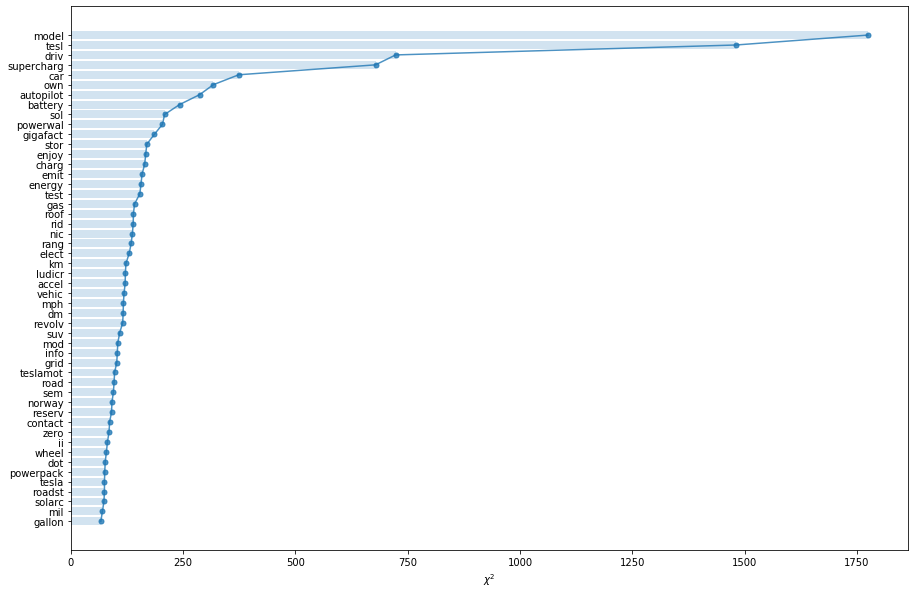

In [172]:
import matplotlib. pyplot as plt
plt.figure(figsize=(15,10))
wscores = zip(vertical_stack.columns, chi2score[0])
wchi2 = sorted(wscores, key=lambda x:x[1])
topchi2 = list(zip(*wchi2[-50:]))
x = range(len(topchi2[1]))
labels = topchi2[0]
plt.barh(x,topchi2[1], align='center', alpha=0.2)
plt.plot(topchi2[1], x, '-o', markersize=5, alpha=0.8)
plt.yticks(x, labels)
plt.xlabel('$\chi^2$')

In [173]:
list(topchi2)[0]

('gallon',
 'mil',
 'solarc',
 'roadst',
 'tesla',
 'powerpack',
 'dot',
 'wheel',
 'ii',
 'zero',
 'contact',
 'reserv',
 'norway',
 'sem',
 'road',
 'teslamot',
 'grid',
 'info',
 'mod',
 'suv',
 'revolv',
 'dm',
 'mph',
 'vehic',
 'accel',
 'ludicr',
 'km',
 'elect',
 'rang',
 'nic',
 'rid',
 'roof',
 'gas',
 'test',
 'energy',
 'emit',
 'charg',
 'enjoy',
 'stor',
 'gigafact',
 'powerwal',
 'sol',
 'battery',
 'autopilot',
 'own',
 'car',
 'supercharg',
 'driv',
 'tesl',
 'model')